In [23]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
plt.style.use('seaborn-darkgrid')

In [5]:
df = pd.read_csv('../yenta.csv')
df.head()

,gender,age,job,is_staff,cnt,male,female,under_21,22_25,26_30,...,top_2,top_3,top_4,top_5,top_1_cnt,top_2_cnt,top_3_cnt,top_4_cnt,top_5_cnt,length
0,male,22,designer,1,266,239,27,9,62,69,...,sales,marketing,pm,strategist,104,94,87,77,73,11
1,male,33,marketer,0,302,274,28,3,20,82,...,ceo,strategist,sales,pm,132,123,98,96,93,12
2,male,24,engineer marketer,0,1414,1304,110,19,199,337,...,sales,marketing,strategist,pm,498,471,467,430,335,12
3,male,34,cto,1,3030,2608,422,43,410,703,...,ceo,sales,strategist,pm,973,924,898,767,736,12
4,male,39,back-office,0,575,532,43,1,45,154,...,marketing,strategist,sales,pm,255,241,198,195,178,12


In [4]:
gen = df[['under_21', '22_25', '26_30', '31_35', '36_40', '41_45', 'over_46']]
gen.head()

,under_21,22_25,26_30,31_35,36_40,41_45,over_46
0,9,62,69,41,24,9,4
1,3,20,82,88,35,17,3
2,19,199,337,300,154,83,34
3,43,410,703,604,373,165,91
4,1,45,154,128,79,26,16


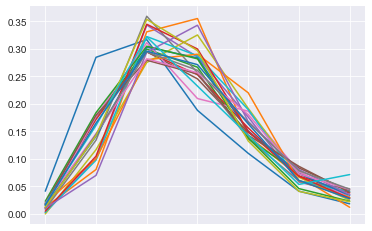

In [47]:
norm_gen = gen.T / gen.sum(axis=1)
norm_gen.plot(legend=False)

/Users/falcon/anaconda3/envs/kaggle/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


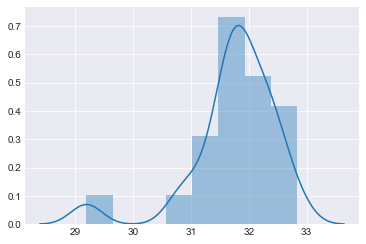

In [52]:
arr = np.array([18, 23, 28, 33, 38, 43, 48])
avg = gen.apply(lambda row: (np.multiply(row, arr) / row.sum()).sum(), axis=1)
sns.distplot(avg)

In [58]:
from scipy import stats

stats.ttest_1samp(avg, popmean=33)

Ttest_1sampResult(statistic=-7.4520029399723855, pvalue=3.426875803781635e-07)

/Users/falcon/anaconda3/envs/kaggle/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


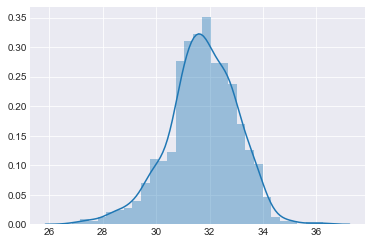

In [74]:
from sklearn.neighbors import KernelDensity

model = KernelDensity()
x_plot = np.arange(16, 51)
kde = model.fit(avg.values[:, np.newaxis])
sns.distplot(kde.sample(1000))

In [103]:
import pymc3 as pm 

with pm.Model() as model: 
    mu = pm.Normal('$\mu$', mu=33, sd=2)
    sd = pm.Gamma('$\sigma$', alpha=2, beta=1)
    mu = pm.Normal('posterior', mu=mu, sd=sd, observed=avg)
    trace = pm.sample(10000)
trace

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [$\sigma$, $\mu$]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:07<00:00, 2691.48draws/s]
/Users/falcon/anaconda3/envs/kaggle/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


<MultiTrace: 2 chains, 10000 iterations, 3 variables>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1282c75c0>,
      dtype=object)

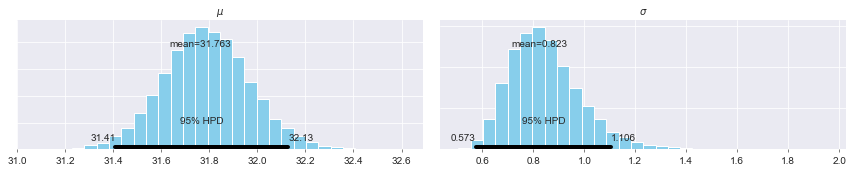

In [104]:
pm.plot_posterior(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126a8c198>,
      dtype=object)

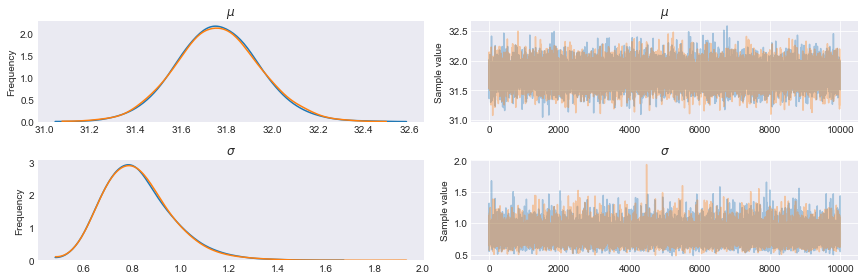

In [105]:
pm.traceplot(trace)

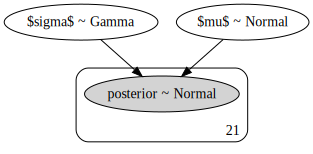

In [106]:
pm.model_to_graphviz(model)

TypeError: 'module' object is not callable